Premer grafa: 3
Iteracija: 26


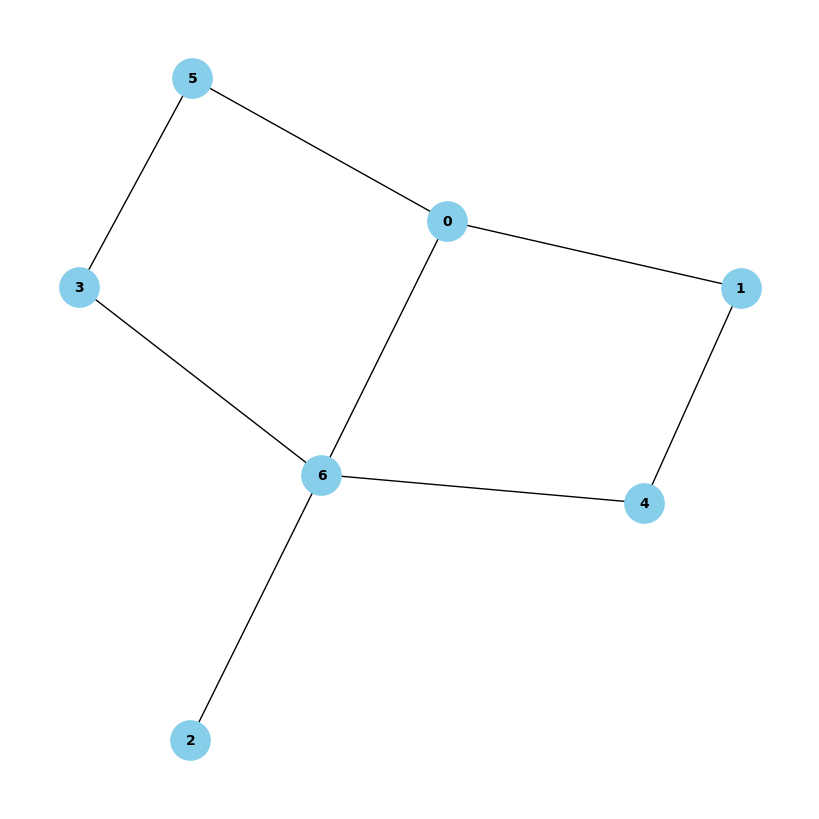

Premer zadnjega grafa: 3
Ni sum ravnovesje, vozlišču 1 se splača zamenjati povezavo (1, 0) z povezavo (1, 5)


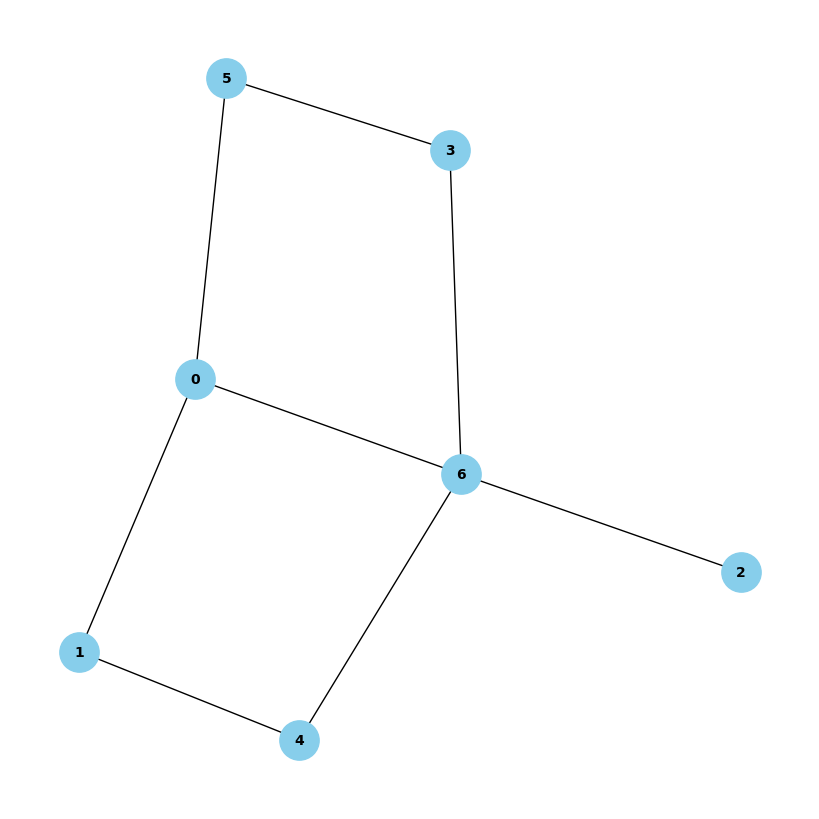

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random


def nakljucni_zacetni_graf(n, e):
    # Create an initial random graph with the specified number of nodes
    G = nx.gnm_random_graph(n, e)
    # Ensure the graph is connected
    while not nx.is_connected(G):
        G = nx.gnm_random_graph(n, e)
    return G


def vsota_razdalj(graf, vozlisce):
    vsota = 0
    for v in graf.nodes - {vozlisce}:
        vsota += nx.shortest_path_length(graf, vozlisce, v)
    return vsota


def vsota_vseh_razdalj(graf):
    vsota = 0
    for n in graf.nodes:
        vsota += vsota_razdalj(graf, n)
    return vsota


def potratno_ravnovesje_sum(graf):
    for v1 in graf.nodes:
        for p in list(graf.edges(v1)):
            for v2 in graf.nodes - {v1}:
                testni_graf = graf.copy()
                testni_graf.remove_edge(*p)
                testni_graf.add_edge(v1, v2)
                if nx.is_connected(testni_graf):
                    if vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                        return f"Ni sum ravnovesje, vozlišču {v1} se splača zamenjati povezavo {p} z povezavo {v1, v2}"
    return 'Je ravnovesje'


def iskanje_social(n, e, max_iteracij):
    trenutna_resitev = nakljucni_zacetni_graf(n, e)
    for iteracija in range(max_iteracij):
        vozlisce1 = random.choice(list(trenutna_resitev.nodes))
        # Odstrani nakljucno povezavo prvega vozlisca
        povezave_vozlisca1 = list(trenutna_resitev.edges(vozlisce1))
        nakljucna_povezava = random.choice(povezave_vozlisca1)
        nova_resitev = trenutna_resitev.copy()
        nova_resitev.remove_edge(*nakljucna_povezava)
        if nx.is_connected(nova_resitev):
            if vsota_vseh_razdalj(trenutna_resitev) >= vsota_vseh_razdalj(nova_resitev):
                trenutna_resitev = nova_resitev.copy()
                print(f"Premer grafa: {nx.diameter(trenutna_resitev)}")
                print(f"Iteracija: {iteracija}")
                plt.figure(figsize=(8, 8))
                nx.draw(trenutna_resitev, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
                plt.show()
        else:
            # Izbere nakljucno drugo vozlisce in ga poveze z prvim
            vozlisce2 = random.choice(list(trenutna_resitev.nodes - set([vozlisce1])))
            nova_resitev.add_edge(vozlisce1, vozlisce2) 
            # Preveri ali je nova rešitev boljša za vozlišče 1, če je posodobi trenutno rešitev
            if nx.is_connected(nova_resitev):
                if vsota_vseh_razdalj(trenutna_resitev) > vsota_vseh_razdalj(nova_resitev):
                    trenutna_resitev = nova_resitev.copy()
                    print(f"Premer grafa: {nx.diameter(trenutna_resitev)}")
                    print(f"Iteracija: {iteracija}")
                    plt.figure(figsize=(8, 8))
                    nx.draw(trenutna_resitev, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
                    plt.show()
    return trenutna_resitev




st_vozlisc = 7
max_iteracij = 100
st_povezav = 8

zadnji_graf = iskanje_social(st_vozlisc, st_povezav, max_iteracij)
print(f"Premer zadnjega grafa: {nx.diameter(zadnji_graf)}")
print(potratno_ravnovesje_sum(zadnji_graf))

plt.figure(figsize=(8, 8))
nx.draw(zadnji_graf, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()

14
Je ravnovesje


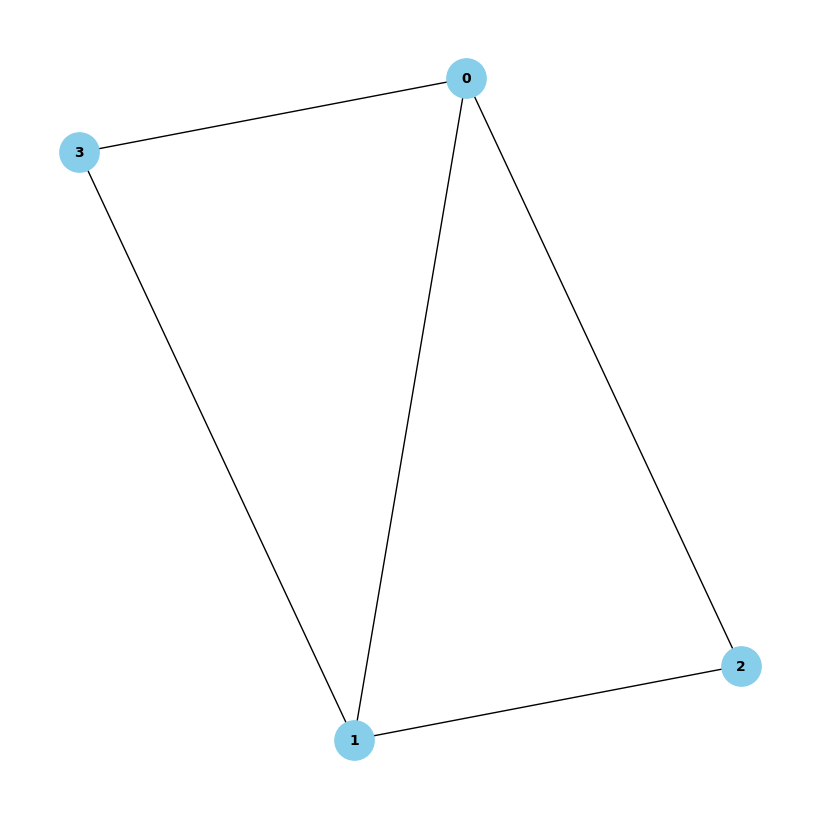

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools as it


def vsi_grafi(n, e):
    # Generate all possible edges combinations
    all_edges = list(it.combinations(range(n), 2))
    
    # Check if e is valid
    if e < n-1 or e > len(all_edges):
        raise ValueError("Invalid number of edges for a graph with {} nodes.".format(n))
    
    # Generate all graphs with n nodes and e edges
    graphs = []
    for edges in it.combinations(all_edges, e):
        G = nx.Graph()
        G.add_nodes_from(range(n))
        G.add_edges_from(edges)
        graphs.append(G)
    
    return graphs

def soc_opti_sum(n, e):
    soc_opt = float('inf')
    vsi = vsi_grafi(n, e)
    graf = vsi[0]

    for i, g in enumerate(vsi):
        if nx.is_connected(g):
            st = vsota_vseh_razdalj(g)
            if st < soc_opt:
                soc_opt = st
                graf = vsi[i]
        
    return soc_opt, graf


n = 4
e = 5

i = soc_opti_sum(n, e)

print(i[0])
print(potratno_ravnovesje_sum(i[1]))
plt.figure(figsize=(8, 8))
nx.draw(i[1], with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()

In [5]:
from tabulate import tabulate


n = 6
data = []

for i in range(2, n + 1):
    row = []
    row.append(i)
    for j in range(i - 1, int(i*(i-1)/2 + 1)):
        k = soc_opti_sum(i, j)
        row.append((k[0], potratno_ravnovesje_sum(k[1]), nx.diameter(k[1])))
    data.append(row)

headers = ["n\e"] + [f"n + { - 2 + i}" for i in range(1, int(n*(n-1)/2 + 1))]



latex_table = tabulate(data, headers, tablefmt="latex")


print(latex_table)

\begin{tabular}{rlllllllllll}
\hline
   n\textbackslash{}e & n + -1                   & n + 0                    & n + 1                    & n + 2                    & n + 3                    & n + 4                    & n + 5                    & n + 6                    & n + 7                    & n + 8                    & n + 9                    \\
\hline
     2 & (2, 'Je ravnovesje', 1)  &                          &                          &                          &                          &                          &                          &                          &                          &                          &                          \\
     3 & (8, 'Je ravnovesje', 2)  & (6, 'Je ravnovesje', 1)  &                          &                          &                          &                          &                          &                          &                          &                          &                          \\
     4 & (18, 'Je ra

In [7]:
from tabulate import tabulate


n = 7
data = []

for i in range(2, n + 1):
    row = []
    row.append(i)
    for j in range(i - 1, int(i*(i-1)/2 + 1)):
        k = soc_opti_sum(i, j)
        row.append((k[0], nx.diameter(k[1])))
    data.append(row)

headers = ["n\e"] + [f"n + { - 2 + i}" for i in range(1, int(n*(n-1)/2 + 1))]



latex_table = tabulate(data, headers, tablefmt="latex")


print(latex_table)

\begin{tabular}{rllllllllllllllll}
\hline
   n\textbackslash{}e & n + -1   & n + 0   & n + 1   & n + 2   & n + 3   & n + 4   & n + 5   & n + 6   & n + 7   & n + 8   & n + 9   & n + 10   & n + 11   & n + 12   & n + 13   & n + 14   \\
\hline
     2 & (2, 1)   &         &         &         &         &         &         &         &         &         &         &          &          &          &          &          \\
     3 & (8, 2)   & (6, 1)  &         &         &         &         &         &         &         &         &         &          &          &          &          &          \\
     4 & (18, 2)  & (16, 2) & (14, 2) & (12, 1) &         &         &         &         &         &         &         &          &          &          &          &          \\
     5 & (32, 2)  & (30, 2) & (28, 2) & (26, 2) & (24, 2) & (22, 2) & (20, 1) &         &         &         &         &          &          &          &          &          \\
     6 & (50, 2)  & (48, 2) & (46, 2) & (44, 2) & (42, 2